# Playground - Part II

🎯 **Hedef**: ***Sinir Ağı hiperparametreleri*** hakkında daha iyi bir anlayış kazanmak

<hr>

👉  [Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.06711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=false&regularizationRate_hide=false) tekrar açın. 

❗️ Algoritma stokastik olduğundan, sonuçların her çalıştırmada farklılık gösterebileceğini unutmayın. Bu nedenle, Sinir Ağlarınızın davranışını analiz etmek ve buna göre sonuçlarınızı çıkarmak için algoritmaları birden çok kez çalıştırmaktan çekinmeyin.

🕵🏻 Ders sırasında gördüğümüz farklı öğeleri inceleyelim:
- **Batch Size**
- **Regularization**
- **Learning Rate**

## (1) The batch size

❓ **İlk Soru** ❓ `circle dataset` (Sınıflandırma) seçin.

* Aşağıdakilerle bir model oluşturun:
* 3 nöronlu bir gizli katman,
* 0,03'e eşit bir a _learning rate_
* ve _tanh_ aktivasyon fonksiyonu

* Herhangi bir gürültü eklemeyin (=0).

* 30'luk bir batch size seçin

***Algoritmanın yakınsamasını inceleyin. Yavaş mı yoksa hızlı mı görünüyor?***

> <i>Seçilen ayarlar (batch size = 30, learning rate = 0.03, tanh aktivasyonu ve gürültüsüz veri) ile algoritmanın yakınsamasının dengeli ve orta hızda olduğu gözlemlenmektedir. Batch size’ın 30 gibi orta bir değer olması, gradyan güncellemelerinin çok gürültülü olmamasını sağlarken aynı zamanda öğrenmenin tamamen yavaşlamasını da engellemektedir. Bu nedenle kayıp fonksiyonu zamanla istikrarlı bir şekilde azalmaktadır. Yakınsama çok hızlı değildir ancak kararlı ilerlemektedir; ani sıçramalar ya da dalgalanmalar gözlenmemektedir. Bu da seçilen batch size’ın model için makul bir denge sunduğunu göstermektedir.</i>

❓ **Soru: 1'lik batch size' da ne oluyor?** ❓

Şimdi, bu sinir ağını aynı veri kümesinde çalıştırın, ancak...

* batch-size 1 olsun.
* En az 150 dönem çalıştırdığınızdan emin olun.

***Eğitim ve test kaybı hakkında ne fark ettiniz? Bu istikrarsızlığın nedeni nedir?***

> <i>Batch size = 1 kullanıldığında, model ağırlıkları her tek veri örneği sonrası güncellendiği için eğitim süreci daha gürültülü ve düzensiz hale gelmektedir. Eğitim kaybı ve test kaybı değerlerinin epoch’lar boyunca dalgalandığı, bazen azalıp bazen arttığı gözlemlenmektedir. Bu durum, batch size = 30’a kıyasla daha istikrarsız bir yakınsamaya yol açmaktadır. Bu istikrarsızlığın temel nedeni, gradyanların yalnızca tek bir örnekten hesaplanmasıdır. Tek örnek üzerinden yapılan güncellemeler, gerçek veri dağılımını yeterince temsil edemediği için yüksek varyanslı gradyanlara sebep olur ve bu da kayıp değerlerinde ani değişimlere yol açar.</i>

❓ **Soru/Gözlem** ❓

Şimdi, tren kaybı ve test kaybı değerlerini okuyarak _batch_size_'ın etkisini görebilirsiniz: yinelemeleri duraklatın ve `“Adım”` düğmesini (play/stop düğmesinin sağ tarafında) kullanarak adım adım (yineleme başına yineleme) çalıştırın.

> <i>Eğitim ve test kaybı değerleri adım adım incelendiğinde, batch size = 1 kullanıldığında kayıp değerlerinin her iterasyonda belirgin şekilde değiştiği görülmektedir. Özellikle “Adım” (step-by-step) modunda çalıştırıldığında, kayıp fonksiyonunun düzgün bir azalma göstermediği, bunun yerine yukarı-aşağı hareketler sergilediği gözlemlenmektedir. Bu durum, küçük batch size’ların öğrenme sürecini daha gürültülü hale getirdiğini ve modelin daha zor ve dengesiz bir şekilde yakınsadığını açıkça ortaya koymaktadır.</i>

## 2. Regularization (Düzenleme)

❓ **Genelleme eksikliği hakkında soru** ❓ 

**Genelleme eksikliğini** bir kez daha gözlemlemek için:
* `“eXclusive OR”(XOR)` veri setini seçin, 
* gürültü seviyesi 50 olsun,
* 8 nöronlu iki gizli katman kullanın. 

***Modelinizi uyumlaştırmaya çalışın... Ne bekliyorsunuz?***

> <i>XOR veri seti, yüksek gürültü seviyesi (noise = 50) ve 8 nöronlu iki gizli katman kullanıldığında modelin eğitim verisine aşırı uyum sağlaması (overfitting) beklenmektedir. Model, karmaşık yapısı sayesinde eğitim verisini oldukça iyi öğrenirken, gürültüyü de öğrenmeye başlayarak genelleme yeteneğini kaybetmektedir. Bu durum, eğitim kaybının düşük olmasına rağmen test kaybının yüksek kalması veya epoch’lar ilerledikçe artması şeklinde gözlemlenmektedir. Sonuç olarak model, gerçek karar sınırı yerine verideki rastgele dalgalanmalara uyum sağlamaktadır.</i>

❗️ Daha küçük bir parti boyutu ile, modeliniz daha hızlı aşırı uyumlanacaktır... ❗️

👉 Bununla birlikte, bir sonraki soru için ***`batch size = 1`*** değerini koruyalım ve `düzenleme` (`regularization`) stratejisini kullanarak aşırı uyumlanmayı nasıl önleyebileceğimizi anlamaya çalışalım.

❓ **Düzenlemeyle (regularization) ilgili soru** ❓

Ağımızı ***avoid overfitting*** için ***düzenleyebilir miyiz***?

* Toplu işleme boyutunu 1 olarak tutun,
* Bir `L2-regularization` ekleyin,
* Karar sınırını düzeltene kadar bu L2 düzenlemesinin gücünü artırın!
Test kaybının artık dönemlerle birlikte artmadığını fark edin.

> <i>Batch size = 1 kullanıldığında ve model karmaşıklığı yüksek olduğunda, ağın çok hızlı şekilde aşırı uyum sağladığı gözlemlenmektedir. Bu nedenle L2 regularization eklemek, modelin daha genellenebilir karar sınırları öğrenmesine yardımcı olmaktadır. L2 düzenlemesinin gücü artırıldıkça, ağırlıkların büyümesi sınırlandırılmakta ve modelin gürültüyü ezberlemesi engellenmektedir. Bu sayede test kaybının epoch’lar boyunca artmak yerine dengelendiği veya azaldığı görülmektedir. Regularization sayesinde eğitim ve test kayıpları arasındaki fark azalmış, modelin genelleme performansı belirgin şekilde iyileşmiştir.</i>

❓ **Spiral veri setiyle ilgili sorular** ❓

<u>Yapılandırma</u>:

* `spiral` veri setini seç,
* Regularization’ı kaldır,
* `training/test` veri oranını %80 eğitim olacak şekilde artır.

<u>Sinir Ağı</u>: 3 gizli katman:
* 1. katmanda 8 nöron,
* 2. katmanda 7 nöron,
* 3. katmanda 6 nöron.

<u>Deney</u>:

* Algoritmayı batch size = 30 ile çalıştır,
* En az 1500 epoch çalıştırdığından emin ol,
* Sonra aynı deneyi batch size = 1 ile yapıp karşılaştır.

Train loss ve test loss değerlerinde adım adım ne olduğuna bakabilirsin.

> <i>Spiral veri seti karmaşık ve doğrusal olmayan bir yapıya sahip olduğu için, modelin öğrenme süreci batch size seçimine karşı oldukça hassas hale gelmektedir. Batch size = 30 ile çalıştırıldığında, eğitim ve test kaybının epoch’lar boyunca daha düzgün ve istikrarlı bir şekilde azaldığı gözlemlenmektedir. Gradyan güncellemeleri daha temsil edici olduğu için karar sınırı daha pürüzsüz bir yapı kazanmaktadır. Buna karşılık batch size = 1 kullanıldığında, eğitim süreci çok daha gürültülü hale gelmektedir. Train loss ve test loss değerleri adım adım incelendiğinde, kayıp fonksiyonunun sık sık dalgalandığı ve yakınsamanın daha düzensiz olduğu görülmektedir. Bazı adımlarda eğitim kaybı azalırken test kaybının arttığı gözlemlenmektedir. Özellikle regularization kaldırıldığı için, batch size = 1 durumunda modelin overfitting’e daha yatkın olduğu açıkça görülmektedir. Sonuç olarak daha büyük batch size, spiral gibi karmaşık veri setlerinde daha kararlı ve genellenebilir bir öğrenme süreci sağlamaktadır.</i>

## (3) The learning rate (Öğrenme oranı)

<u>`circle veri setine`</u> geri dön:

* Gürültü (noise) olmadan,
* Eğitim / test veri oranı %50 olacak şekilde,
* Batch size = 20 kullan.

<u>Sinir ağı</u> ayarları:
* 5 nöronlu tek bir katman,
* Regularization yok,
* `tanh` aktivasyon fonksiyonu.

❓ **Learning rate ile ilgili soru** ❓

Her bir learning rate değeri için (0.0001’den 10’a kadar):
* Algoritmayı 1000 epoch boyunca çalıştır,
* Test loss değerlerini aşağıdaki listeye kaydet,
* Ardından test loss değerlerini learning rate’e göre çiz (plot).

❗️ <u>Uyarı</u> ❗️  
Learning rate’i her değiştirdiğinde sinir ağını mutlaka **yeniden başlat**  
(_play/pause tuşunun solundaki circular arrow_).

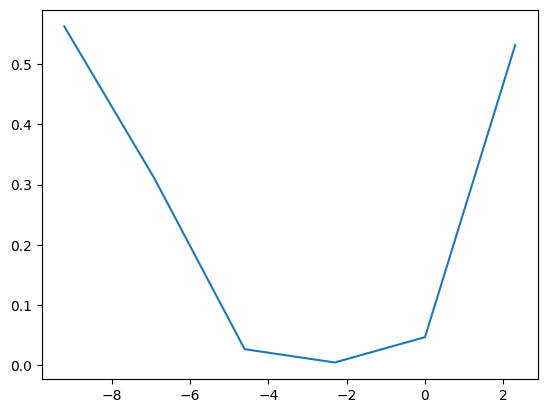

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
# test_loss = [UNCOMMENT THIS CELL AND STORE YOUR LOSS VALUES IN THIS LIST]
# $DELETE_BEGIN
test_loss = [0.562, 0.310, 0.027,  0.005, 0.047, 0.531]
# $DELETE_END

plt.plot(np.log(learning_rates), test_loss)

❗️ <u>Uyarı</u> ❗️  
Hem **çok düşük** hem de **çok yüksek** learning rate değerleri yüksek test loss’a yol açar… fakat **farklı nedenlerle**!

* **Düşük learning rate**:
  - Sinir ağının, orta seviyedeki bir learning rate’e benzer şekilde yakınsamasını sağlar
  - Ancak **çok daha yavaş** olur → yani **daha fazla epoch** gerekir

* **Yüksek learning rate**:
  - Algoritmanın tamamen **dağılmasına (diverge)** neden olur
  - Örneğin learning rate \( \alpha = 10 \) ve 400 epoch dene:
    - Loss değerinin sürekli değiştiğini görürsün
    - Bu durum, algoritmanın **farklı yerel minimumlara** yakınsadığını gösterir

🏁 Tebrikler!

💾 Not defterinizi `git add/commit/push` yapmayı unutmayın...